In [ ]:
import struct
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
import struct

def read_chunk(file):
    chunk_length, chunk_type = struct.unpack('>I4s', file.read(8))
    chunk_data = file.read(chunk_length)
    chunk_crc = file.read(4)
    return chunk_type.decode('ascii'), chunk_data, chunk_crc

def display_chunk_info(chunk_type, chunk_data, chunk_crc):
    print(f"Type: {chunk_type}, Length: {len(chunk_data)}")
    print(f"CRC: {chunk_crc}")
    print()

def extract_ihdr_data(chunk_data):
    ihdr_values = struct.unpack('>2I5B', chunk_data)
    width, height, bit_depth, color_type, compression_method, filter_method, interlace_method = ihdr_values
    print("IHDR Chunk:")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"Bit Depth: {bit_depth}")
    print(f"Color Type: {color_type}")
    print(f"Compression Method: {compression_method}")
    print(f"Filter Method: {filter_method}")
    print(f"Interlace Method: {interlace_method}")
    print()

input_file = "bethoven.png"

with open(input_file, "rb") as file:

    png_signature = file.read(8)
    if png_signature != b'\x89PNG\r\n\x1a\n':
        raise ValueError("File is not a valid PNG.")

    print("PNG signature is valid.\n")


    chunks = []

    while True:
        try:
            chunk_type, chunk_data, chunk_crc = read_chunk(file)
            chunks.append((chunk_type, chunk_data, chunk_crc))
            if chunk_type == 'IEND':
                break
        except struct.error:
            break

idat_count = 0
idat_total_size = 0

for chunk_type, chunk_data, chunk_crc in chunks:
    if chunk_type == 'IHDR':
        extract_ihdr_data(chunk_data)


    if chunk_type == 'IDAT':
        idat_count += 1
        idat_total_size += len(chunk_data)

        print(f"IDAT Chunk {idat_count}:")
        display_chunk_info(chunk_type, chunk_data, chunk_crc)

    if chunk_type == 'IEND':
        display_chunk_info(chunk_type, chunk_data, chunk_crc)

print(f"Total IDAT Chunks: {idat_count}")
print(f"Total IDAT Size: {idat_total_size} bytes")

PNG signature is valid.

IHDR Chunk:
Width: 1038
Height: 884
Bit Depth: 8
Color Type: 2
Compression Method: 0
Filter Method: 0
Interlace Method: 0

IDAT Chunk 1:
Type: IDAT, Length: 65445
CRC: b'`\x8f\xa3\xf4'

IDAT Chunk 2:
Type: IDAT, Length: 65524
CRC: b'\xa4y\x02\xdf'

IDAT Chunk 3:
Type: IDAT, Length: 65524
CRC: b'@\xfd\xde\xae'

IDAT Chunk 4:
Type: IDAT, Length: 65524
CRC: b'{\x0e\xaa\\'

IDAT Chunk 5:
Type: IDAT, Length: 65524
CRC: b'qp}\xa1'

IDAT Chunk 6:
Type: IDAT, Length: 65524
CRC: b'Z\x8c7t'

IDAT Chunk 7:
Type: IDAT, Length: 65524
CRC: b'\xa72.\xc7'

IDAT Chunk 8:
Type: IDAT, Length: 65524
CRC: b'\xa8\xc1<\\'

IDAT Chunk 9:
Type: IDAT, Length: 65524
CRC: b'\xc3\x18\xdc\xc5'

IDAT Chunk 10:
Type: IDAT, Length: 65524
CRC: b'EsX\xfc'

IDAT Chunk 11:
Type: IDAT, Length: 65524
CRC: b'\xa5Y\x89v'

IDAT Chunk 12:
Type: IDAT, Length: 65524
CRC: b'e`\xd6\xe4'

IDAT Chunk 13:
Type: IDAT, Length: 65524
CRC: b'\x0ebS4'

IDAT Chunk 14:
Type: IDAT, Length: 65524
CRC: b'\xdbvQ\x11'

ID

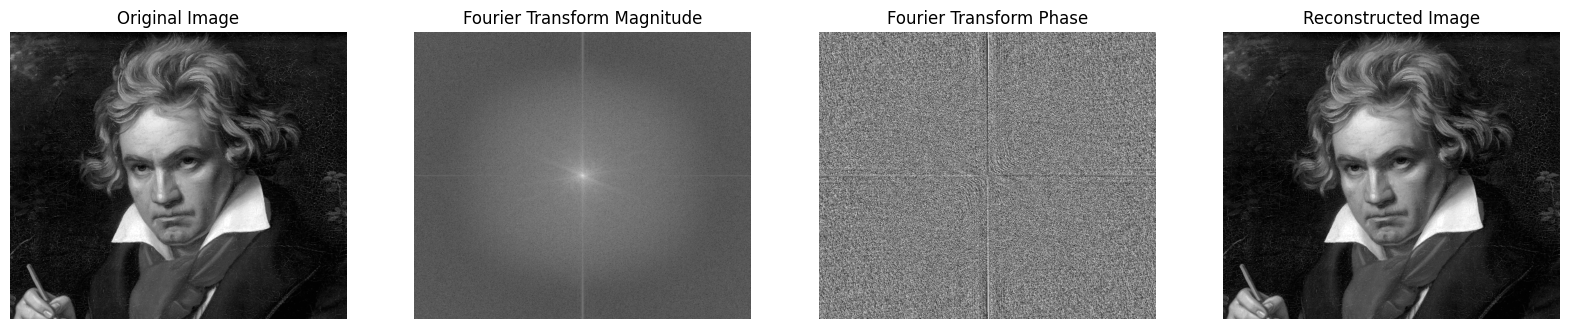

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fourier_transform(input):
    ft = np.fft.fft2(input)
    return np.fft.fftshift(ft)

def inverse_fourier_transform(input):
    ift = np.fft.ifftshift(input)
    ift_image = np.fft.ifft2(ift)
    return np.abs(ift_image)

input_file = "bethoven.png"

image = Image.open(input_file).convert('L')
image = np.array(image)


ft = fourier_transform(image)
magnitude_spectrum = np.log1p(np.abs(ft))
phase_spectrum = np.angle(ft)
ift_image = inverse_fourier_transform(ft)


plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(142)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Transform Magnitude")
plt.axis("off")

plt.subplot(143)
plt.imshow(phase_spectrum, cmap='gray')
plt.title("Fourier Transform Phase")
plt.axis("off")

plt.subplot(144)
plt.imshow(ift_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis("off")

plt.show()


In [ ]:
def remove_metadata(input_file, output_file):
  image = Image.open(input_file)
  data = list(image.getdata())
  image_without_metadata = Image.new(image.mode, image.size)
  image_without_metadata.putdata(data)
  image_without_metadata.save(output_file)


def print_metadata(file):
  image = Image.open(file)
  data = image.info
  print(f"Metadata for {file}:")
  for key, value in data.items():
    print(f"{key}: {value}")


input_file = "bethoven.png"
output_file = input_file.replace(".png", "_test.png")
remove_metadata(input_file, output_file)

print("Before: ")
print_metadata(input_file)

print("\nAfter: ")
print_metadata(output_file)

Before: 
Metadata for bethoven.png:
srgb: 0
gamma: 0.45455
dpi: (95.9866, 95.9866)

After: 
Metadata for bethoven_test.png:


wczytywac pola krytyczne, i powyswietlac dane z nich, oraz crc i png signature, pozostalych chunkow wypisac jedynie rozmiar
do transformaty fouriuera dodac faze i wyswietlic na oddzielnym obrazku jak abs